# Identification of handwritten digits using CNN

import libraries

In [3]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


import and load MNIST dataset

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [6]:
(xtrain,ytrain),(xtest,ytest)=load_data()

reshape and normalize

In [7]:
xtrain=xtrain.reshape((xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1))
xtest=xtest.reshape((xtest.shape[0],xtest.shape[1],xtest.shape[2],1))

In [8]:
xtrain=xtrain.astype('float32')/255.0
xtest=xtest.astype('float32')/255.0

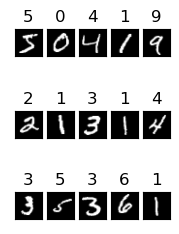

In [9]:
fig=plt.figure(figsize=(2,3))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(xtrain[i]),cmap='gray')
    ax.set_title(ytrain[i])

In [10]:
inp_shape=xtrain.shape[1:]

In [11]:
print(len(xtrain))
print(len(xtest))

60000
10000


Build CNN model

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=inp_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

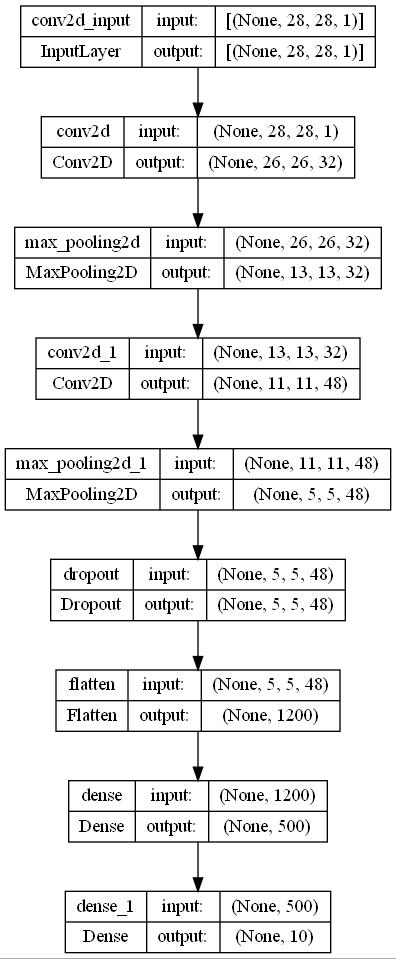

In [14]:
plot_model(model,'model.jpg',show_shapes=True)

Train 10 epochs

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x=model.fit(xtrain,ytrain,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

In [16]:
loss, accuracy= model.evaluate(xtest, ytest, verbose=0)
print('accuracy', accuracy*100)

accuracy 99.11999702453613


Predict

In [48]:
ypreds = model.predict(xtest)

313/313 [==============================] - 2s 7ms/step


In [60]:
import random
for j in range(5): #check for 5 inputs
    i = random.randint(0,len(ytest))
    print("predicted",argmax(ypreds[i]))
    print("actual",ytest[i])


predicted 9
actual 9
predicted 0
actual 0
predicted 2
actual 2
predicted 4
actual 4
predicted 1
actual 1
